# Geodatenanalyse 1

## Tag 2 / Block 2 / Übung 6: Zeitreihenanalyse

 In der Datei "GW_Signal.csv" findet Ihr Zeitreihen zur Grundwassertemperatur einiger Pegel aus den vorherigen Übungen. Wir lesen diese nun zuerst ein und wandeln das Datum der Messung über `pandas.to_datetime` in den Datentyp `datetime64` um. Das Attribut `.format` gibt das spezielle Format der Datumsangabe an ("%d.%m.%Y"). Mehr dazu erfahrt Ihr morgen. 

In [2]:
# [1] hier Code eingeben
import pandas as pd
signal = pd.read_csv('GW_Signals.csv', sep=';', encoding='cp1252')
signal['Datum']=pd.to_datetime(signal['Datum'], format='%d.%m.%Y')


### 1. Zerlegung von Zeitreihen

Zerlegt nun eine der Zeitreihen (z.B. `data['T108']`) in ihre Komponenten (Trend, Saisonalität und Residuen) mit Hilfe von dem Package `statsmodels.api` und der Funktion `tsa.seasonal_decompose()`. 

Erzeugt mit der Funktion zuerst ein decomposition-Objekt. Gebt dazu als Inputs die gewünschte Spalte des Datensatzen (z.B. `data['T108']`), das `model` ("=additive") und die `period` (=365) an. Ausgehend von dem erzeugten Objekt könnt Ihr mit dem Argument `.plot()`, eine einfache Abbildung erstellen und die Eregebnisse der Zerlegung so graphisch darstellen. 


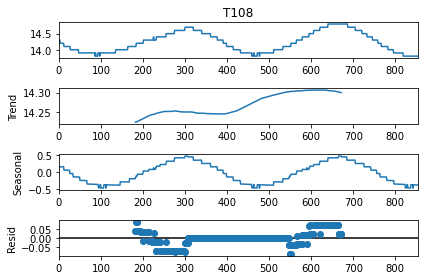

In [3]:
# [2] hier Code eingeben
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(signal['T108'], model='additive', period=365)
fig = decomposition.plot()

Das erzeugte Objekt hat verschiedene Attribute (z.B. trend, seasonal, resid). Erstellt nun ein Histogramm der Residuen ("resid") der obigen Zeitreihenanalyse, und interpretiert es im Hinblick auf Normalverteilung, Mittelwert und den Einfluss von Messfehlern. 

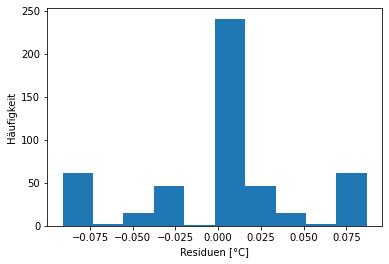

In [4]:
# [3] hier Code eingeben
import matplotlib.pyplot as plt
residuen = decomposition.resid
fig = plt.hist(residuen)
plt.ylabel("Häufigkeit")
plt.xlabel("Residuen [°C]")
plt.show()

### 2. Autokorrelation

Schaut Euch nun als nächstes die Autokorrelation der Zeitreihe an, den sog. "AutoCorrelation Function" (ACF) plot, also die Korrelation eines Wertes in der Zeitreihe mit einem früheren Wert. Importiert dazu `statsmodels.grpahics.tsaplots.plot_acf()` und gebt neben dem Datensatz das Zeitintervall `lags` als Input an. 

Probiert ein paar verschiedene Werte für `lags` aus, und interpretiert die Korrelationen in Bezug auf den plot mit Trend und Saisonalität oben. 

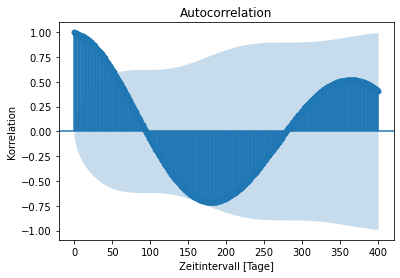

In [5]:
# [4] hier Code eingeben
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(signal['T108'], lags = 400)
plt.ylabel("Korrelation")
plt.xlabel("Zeitintervall [Tage]")
plt.show()

### 3. gleitender Mittelwert

Eine andere beliebte Methode zur Analyse des Trends einer Zeitreihe ist die Bestimmung des gleitenden Mittelwertes (auch moving oder rolling average genannt). Dadurch werden hohe Frequenzen und saisonale Effekte "wegemittelt" und Zeitreihen geglättet. Für den Datentyp "list" geht dies ganz einfach durch Anhängen von `.rolling()` und die Angabe des Bereichs über den gemittelt werden soll mit dem Argument "window". Bei "window=10" wird so der arithmetische Mittelwert aus den letzten 10 Messwerten gebildet. 

Testet verschiedene Fensterbreiten und/oder Zeitreihen und vegleicht die ursprüngliche Zeitreihe mit dem Verlauf des gleitenden Mittelwertes in dem Ihr beide Zeitreihen graphisch darstellt. Worin seht Ihr die Vor- und Nachteile von Zerlegung bzw. gleitendem Mittel? 

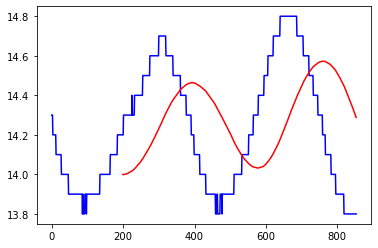

In [6]:
# [5] hier Code eingeben
rolling = signal['T108'].rolling(window=200)
rolling_mean = rolling.mean()
signal['T108'].plot(color='blue')
rolling_mean.plot(color='red')
plt.show()

Wenn Ihr noch Zeit habt könnt Ihr die Analysen für weitere Zeitreihen durchführen. 

In [ ]:
# [6] hier Code eingeben
# weitere Zeitreihen und/oder Visualisierungen

## Ende

